In [15]:
import cv2
import numpy as np
import time 
from datetime import datetime
import threading
import cv2
import numpy as np
import time 
from datetime import datetime
import threading
import os
import imutils
import tkinter as tk
import tkinter
from tkinter import ttk,Tk,messagebox
import sqlite3
from PIL import ImageTk,Image
import cv2
import imutils
import sys
from tkinter import Frame
from tkinter import Toplevel
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.animation import FuncAnimation
from random import randrange
from skimage.transform import resize



In [16]:
# ----------- READ DNN MODEL -----------

# Weights
model = "model/MobileNetSSD_deploy.caffemodel"
# Model architecture
prototxt = "model/MobileNetSSD_deploy.prototxt.txt"

# Class labels
classes = {0:"background", 1:"aeroplane", 2:"bicycle",
          3:"bird", 4:"boat",
          5:"bottle", 6:"bus",
          7:"car", 8:"cat",
          9:"chair", 10:"cow",
          11:"diningtable", 12:"dog",
          13:"horse", 14:"motorbike",
          15:"person", 16:"pottedplant",
          17:"sheep", 18:"sofa",
          19:"train", 20:"tvmonitor"}

# Load the model
net = cv2.dnn.readNetFromCaffe(prototxt, model)

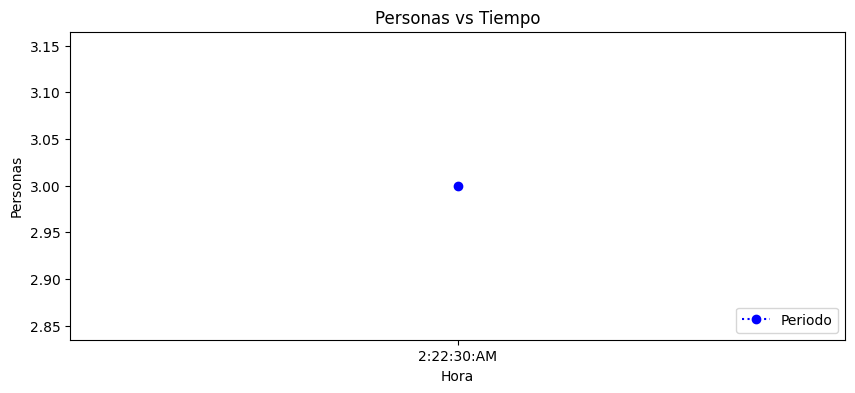

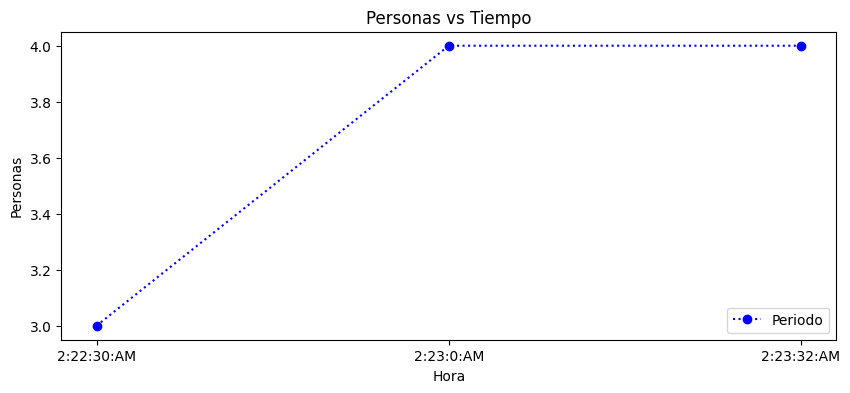

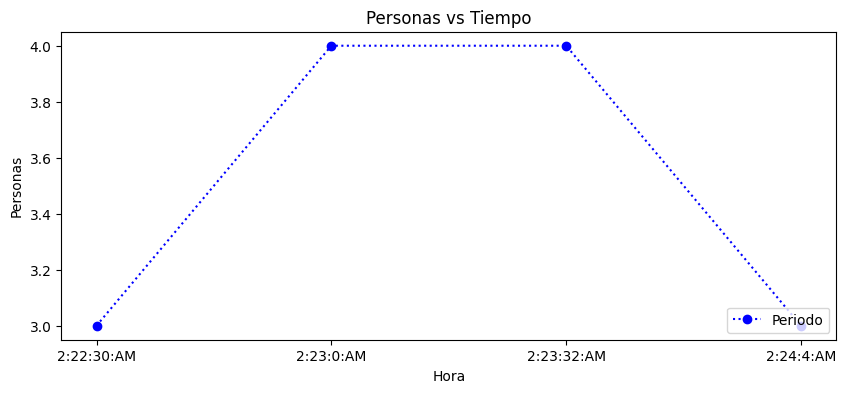

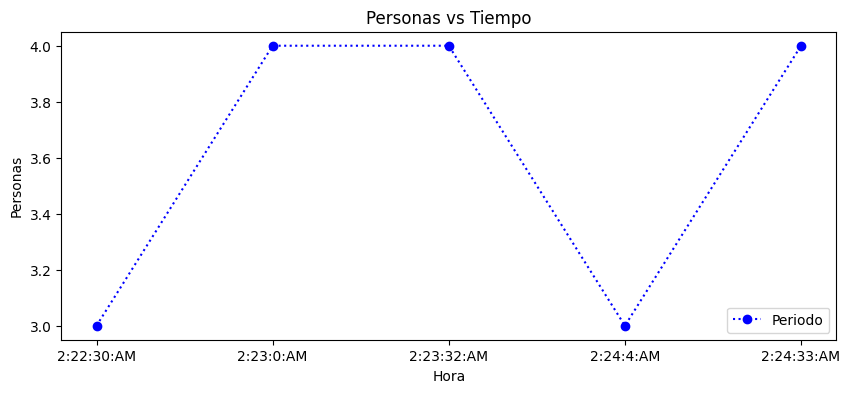

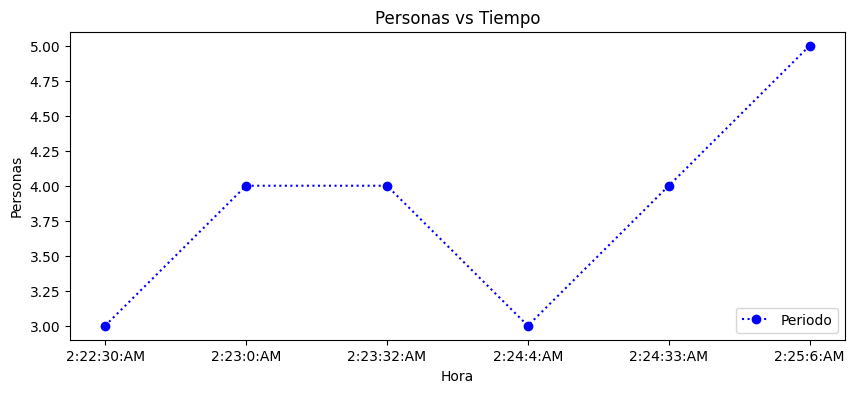

In [257]:
ventana = tk.Tk()
ventana.geometry("950x500")
ventana.title("Detector de Aglomeraciones")
ventana.resizable(width=False,height=False)




def cant_person(f1):
     cont_personas=0
     # Model configuration
     config = "model/yolov3.cfg"
     # Weights
     weights = "model/yolov3.weights"
     # Labels
     LABELS = open("model/coco.names").read().split("\n")

     #print(LABELS, len(LABELS))
     colors = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

    #print("colors.shape:", colors.shape)
    # Load model

     net = cv2.dnn.readNetFromDarknet(config, weights)

    # --------------- READ THE IMAGE AND PREPROCESSING ---------------
     image = f1
     height, width, _ = image.shape

     # Create a blob
     blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
                              swapRB=True, crop=False)
#print("blob.shape:", blob.shape)
# --------------- DETECTIONS AND PREDICTIONS ---------------
     ln = net.getLayerNames()
#print("ln:", ln)
# ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()] 
     ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
#print("ln:", ln)
     net.setInput(blob)
     outputs = net.forward(ln)
#print("outputs:", outputs)
     boxes = []
     confidences = []
     classIDs = []


     for output in outputs:
       for detection in output:
          #print("detection:", detection)
           scores = detection[5:]
          #classID = np.argmax(scores)
           classID = np.argmax(1)
           confidence = scores[classID]
           if confidence > 0.5:
               #print("detection:", detection)
               #print("classID:", classID)
               box = detection[:4] * np.array([width, height, width, height])
               #print("box:", box)
               (x_center, y_center, w, h) = box.astype("int")
               #print((x_center, y_center, w, h))
               x = int(x_center - (w / 2))
               y = int(y_center - (h / 2))
               #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
               boxes.append([x, y, w, h])
               confidences.append(float(confidence))
               classIDs.append(classID)
     
     idx = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
#print("idx:", idx)


     if len(idx) > 0: 
      for i in idx:
          (x, y) = (boxes[i][0], boxes[i][1])
          (w, h) = (boxes[i][2], boxes[i][3])
          
          color = colors[classIDs[i]].tolist()
          text = "{}: {:.3f}".format(LABELS[classIDs[i]], confidences[i])
          cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
          cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)
          cont_personas=cont_personas+1

     conper= str(cont_personas)
     cv2.putText(img=f1,
        text=conper,
        org=(10,100),
        fontFace=3,
        fontScale=2,
        color=(127, 255, 0),
        thickness=5)

     return cont_personas
          
          
def person_detectada(frame,width,height,label,detection):
     box = detection[3:7] * [width, height, width, height]
     x_start, y_start, x_end, y_end = int(box[0]), int(box[1]), int(box[2]), int(box[3])
     cv2.rectangle(frame, (x_start, y_start), (x_end, y_end), (0, 255, 0), 2)
     cv2.putText(frame, "Conf: {:.2f}".format(detection[2] * 100), (x_start, y_start - 5), 1, 1.2, (255, 0, 0), 2)
     cv2.putText(frame, label, (x_start, y_start - 25), 1, 1.5, (0, 255, 255), 2)

global yper
yper=[]
global xtiem
xtiem=[]
    
    

#procedimiento carpetas
dataPath = 'DATA' 
personPath = dataPath 
if not os.path.exists(personPath):
    print('Carpeta creada: ',personPath)
    os.makedirs(personPath)


video = None
def video_stream():
    global video
    global scont
    scont=0
    global prom
    prom=0
    #total de numero de personas detectadas
    global nummayorper
    nummayorper=0
    global count
    count=0
    global contitem
    contitem=0
    global index
    index=0
    global iid
    iid=0
   
    #cap = cv2.VideoCapture(0)
    video_path = "Personas/prueba_parada1.mp4"
    video = cv2.VideoCapture(video_path)
    iniciar()

def iniciar():
    global video
    global count
    global scont
    global prom
    global nummayorper
    global contitem
    global per1
    global per2
    global per3
    global per4
    global per5
    global per6
    global per7
    global per8

    
    ret,frame = video.read()
    if ret == True:
     
        #activando funcion tiempo actual 
      hoy=datetime.now()

     #implementacion de formato de fecha 
      fecha = hoy.strftime('Fecha: %Y-%m-%d')

     #determinacion de las variables de tiempo
     #estas son necesarias para activar la 
     # deteccion de publico
     #durante un perido de tiempo
      hora = str(hoy.hour)   
      minutos = str(hoy.minute) 
      segundos = str(hoy.second)
      pm_am = hoy.strftime('%p')     

     #implementacion de formato hora
      hora_actual = hora+':'+minutos+':'+segundos+':'+pm_am

     #recopilacion de frame identificadores
     #de la cantidad exactas de personas 

      
        
      frame = imutils.resize(frame,width=640)
      frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
      frame = imutils.resize(frame,width=360)
      #contador de frames
      count = count + 1
      if(count==1 or 
        count==50 or 
        count==100 or 
        count==150 or 
        count==200 or 
        count==250 or 
        count==300 or 
        count==350):

        #f1=cv2.imwrite(dataPath+'/frame_{}.jpg'.format(count),frame)    
        f1=cv2.resize(frame, (650, 450))
        cont=cant_person(f1)

        #personas detectadas por periodos
        if(count==1):
          per1=cont

        if(count==50): 
          per2=cont

        if(count==100):
          per3=cont

        if(count==150):
          per4=cont 

        if(count==200):
          per5=cont

        if(count==250):
          per6=cont

        if(count==300):
          per7=cont

        if(count==350): 
          per8=cont 

        scont=scont+cont

        if count==350:
           prom=scont/8

           #buscador que identifica cual 
           #de las detecciones por periodo es mayor

           #caso cuando en el periodo  
           if(per1>=per2 and
              per1>=per3 and
              per1>=per4 and
              per1>=per5 and
              per1>=per6 and
              per1>=per7 and
              per1>=per8):
              nummayorper=per1
              

           if(per2>=per1 and
              per2>=per3 and
              per2>=per4 and
              per2>=per5 and
              per2>=per6 and
              per2>=per7 and
              per2>=per8):
              nummayorper=per2  
              

           if(per3>=per1 and
              per3>=per2 and
              per3>=per4 and
              per3>=per5 and
              per3>=per6 and
              per3>=per7 and
              per3>=per8):
              nummayorper=per3
              

           if(per4>=per1 and
              per4>=per2 and
              per4>=per3 and
              per4>=per5 and
              per4>=per6 and
              per4>=per7 and
              per4>=per8):
              nummayorper=per4
              

           if(per5>=per1 and
              per5>=per2 and
              per5>=per3 and
              per5>=per4 and
              per5>=per6 and
              per5>=per7 and
              per5>=per8):
              nummayorper=per5
              

           if(per6>=per1 and
              per6>=per2 and
              per6>=per3 and
              per6>=per4 and
              per6>=per5 and
              per6>=per7 and
              per6>=per8):
              nummayorper=per6
              

           if(per7>=per1 and
              per7>=per2 and
              per7>=per3 and
              per7>=per4 and
              per7>=per5 and
              per7>=per6 and
              per7>=per8):
              nummayorper=per7
              

           if(per8>=per1 and
              per8>=per2 and
              per8>=per3 and
              per8>=per4 and
              per8>=per5 and
              per8>=per6 and
              per8>=per7):
              nummayorper=per8  
             

           scont=0
           count=0
           contitem=contitem+1

           #intentos por desarrollar la grafica
           xtiem.append(hora_actual)
           yper.append(nummayorper)
           
         

           treeView1.insert(parent='', index=contitem, iid=contitem, text='',
                      values=(str(contitem),  
                     hora_actual,
                      str(per1),
                      str(per2),
                      str(per3),
                      str(per4),
                      str(per5),
                      str(per6),
                      str(per7),
                      str(per8),
                      str(nummayorper),
                      str(int(prom))))
      
      height2, width2, _ = frame.shape
      
      # Create a blob
      blob = cv2.dnn.blobFromImage(frame, 0.007843, (300, 300), (127.5, 127.5, 127.5))
     #print("blob.shape:", blob.shape)

     # ----------- DETECTIONS AND PREDICTIONS -----------
      net.setInput(blob)
      detections = net.forward()     

     #if (hoy.hour>=h1 and hoy.minute>=min1)and(hoy.hour<=h2 and hoy.minute<=min2): 
      for detection in detections[0][0]:
             #print(detection)
             if detection[2] > 0.45:
                  label = classes[detection[1]]
                 #print("Label:", label)
                  if label=='person':
                  #llamando metodo señalador de la persona detectada
                     person_detectada(frame,width2,height2,label,detection)
      


      #impresion de fecha
      cv2.putText(frame,fecha,(80,12), 1, 1,(0, 255, 255),2)
     #impresion de tiempo transcurrido
      cv2.putText(frame,hora_actual,(270, 200), 1, 1,(0, 255, 255),2)
      
      #inpresion de personas detectadas
      
      cv2.putText(frame,"Per:"+str(nummayorper),
                 (10,25),
                 1,
                 1,
                 (127, 255, 0),
                 2)  

     #impresion de periodos
      periodos=str(count)
      cv2.putText(frame,"Conteo:"+periodos,
                 (10,200),
                 1,
                 1,
                 (127, 255, 0),
                 2)   
      #frame=cv2.resize(frame, (525,475))
      img = Image.fromarray(frame)
      #img.resize((525,600),Image.ANTIALIAS)
      image = ImageTk.PhotoImage(image=img)
      etiq_de_video.configure(image=image)
      etiq_de_video.image = image

      #almacenamiento de la informacion adquirida 
      #por parte de la deteccion 

      etiq_de_video.after(1,iniciar)
    else:
        etiq_de_video.image=""
        video.release()
        
        
def quitar():
    global video
    global scont
    scont=0
    global prom
    prom=0
    #total de numero de personas detectadas
    global nummayorper
    nummayorper=0
    global count
    count=0
    global contitem
    contitem=0
    global index
    index=0
    global iid
    iid=0
    
    
    x=treeView1.get_children()
    for i in x:
     treeView1.delete(i)
   
    
    xtiem.clear()
    yper.clear()


#etiq_de_video.place_forget()
    video.release()
    
def estadistica():
    ventana2 = tk.Toplevel()
    ventana2.geometry("1100x493")
    ventana2.title("Estadistica")
    header3 = Frame(ventana2,bg="blue")
    header3.place(x=0,y=0,width=1100,height=500)

    #grafica de periodos
    
    plt.figure(figsize=(10,4))
    plt.plot(xtiem,yper,marker='o',linestyle=':',color='b',label="Periodo")
  


    plt.xlabel("Hora")
    plt.ylabel("Personas")
    plt.title("Personas vs Tiempo")
    plt.legend(loc="lower right")
    plt.savefig("Estadisticas\Grafico1.jpg")
    graphImage = Image.open("Estadisticas\Grafico1.jpg")
    photo = ImageTk.PhotoImage(graphImage)
    graph = tk.Label(ventana2,image=photo,bg="#ffffff")
    graph.image = photo
    graph.place(x=40,y=70)
 

#Colores 
fondo_boton = "#5e17eb"


header2 = Frame(ventana,bg="blue")
header2.place(x=0,y=0,width=1010,height=500)


#cordenads de base de datos
Frame2 = Frame(ventana,bg="#009aa5")
Frame2.place(x=5,y=50,width=400,height=335)



scrollbar =  tk.Scrollbar(Frame2, orient= tk.HORIZONTAL)
scrollbar.pack(side="bottom", fill="x")
##:::::::::::::::::::comienzo de tabla o treeview:::::::::::::::::::::::::::::::::::::::::::::::::

treeView1 = ttk.Treeview(Frame2,height=19,xscrollcommand=scrollbar.set)
treeView1["columns"]=("Column 1",
                      "Column 2",
                      "Column 3",
                      "Column 4",
                      "Column 5",
                      "Column 6",
                      "Column 7",
                      "Column 8",
                      "Column 9",
                      "Column 10",
                      "Column 11",
                      "Column 12",
                      "Column 13")


##:::::::::::::::::aqui se define el ancho de cada columna:::::::::::::::::::::::::::::::::::::::::
treeView1.column("#0",width=0,minwidth=40)
treeView1.column("Column 1",width=60,minwidth=30)
treeView1.column("Column 2",width=80,minwidth=30)
treeView1.column("Column 3",width=60,minwidth=30)
treeView1.column("Column 4",width=60,minwidth=30)
treeView1.column("Column 5",width=60,minwidth=30)
treeView1.column("Column 6",width=60,minwidth=30)
treeView1.column("Column 7",width=60,minwidth=30)
treeView1.column("Column 8",width=60,minwidth=30)
treeView1.column("Column 9",width=60,minwidth=30)
treeView1.column("Column 10",width=60,minwidth=30)
treeView1.column("Column 11",width=60,minwidth=30)
treeView1.column("Column 12",width=60,minwidth=30)
treeView1.column("Column 13",width=60,minwidth=30)
##:::::::::::::::::aqui se define el encavazado  de cada columna y aliniacion del texto:::::::::::::
treeView1.heading("Column 1",text="Iteración",anchor="center")
treeView1.heading("Column 2",text="Hora",anchor="center")
treeView1.heading("Column 3",text="Periodo 1",anchor="center")
treeView1.heading("Column 4",text="Periodo 2",anchor="center")
treeView1.heading("Column 5",text="Periodo 3",anchor="center")
treeView1.heading("Column 6",text="Periodo 4",anchor="center")
treeView1.heading("Column 7",text="Periodo 5",anchor="center")
treeView1.heading("Column 8",text="Periodo 6",anchor="center")
treeView1.heading("Column 9",text="Periodo 7",anchor="center")
treeView1.heading("Column 10",text="Periodo 8",anchor="center")
treeView1.heading("Column 11",text="MAX PER",anchor="center")
treeView1.heading("Column 12",text="Promedio",anchor="center")
treeView1.heading("Column 13",text="",anchor="center")

##:::::::::::::::::aqui se define la posicion donde se colocra la tabla o Treeview:::::::::::::::::
treeView1.place(x=0, y=0)


treeView1.pack(side="top", fill="x")
scrollbar.config(command=treeView1.xview)


Frame3 = Frame(ventana,bg="black")
Frame3.place(x=420,y=8,width=522,height=480)

#Botones
boton = tk.Button(ventana,text="Iniciar",bg=fondo_boton,relief="flat",
                 cursor="hand2",command=video_stream,width=11,height=3,font=("Calisto MT",12,"bold"))     
boton.place(x=5,y=400)
boton2 = tk.Button(ventana,text="Recetear",bg=fondo_boton,relief="flat",
                cursor="hand2",command=quitar,width=11,height=3,font=("Calisto MT",12,"bold"))
boton2.place(x=145,y=400)
boton3 = tk.Button(ventana,text="Grafica",bg=fondo_boton,relief="flat",
                cursor="hand2",command=estadistica,width=11,height=3,font=("Calisto MT",12,"bold"))
boton3.place(x=285,y=400)


#titulo principal
heading = tk.Label(ventana,text="Detetor de Aglomeraciones en Paradas",font=("",16,"bold"))
heading.place(x=5,y=10)



# Etiqueta
etiq_de_video = tk.Label(ventana,bg="black")
etiq_de_video.place(x=420,y=8)

ventana.mainloop()
